[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 404.0998631256591


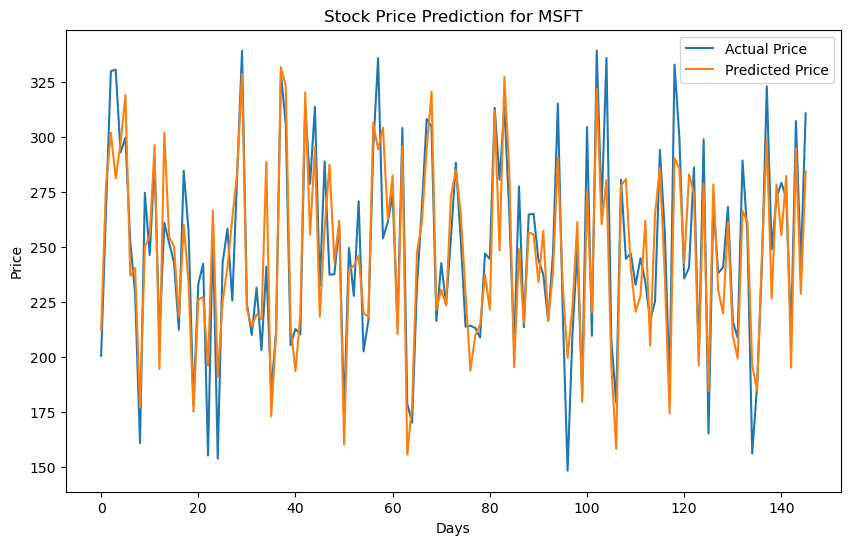

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch stock data using yfinance (e.g., for Apple Inc.)
ticker = 'MSFT'  # You can replace this with any stock symbol
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Feature selection: Use the 'Close' price as the target variable and create a 'Prediction' column
data['Prediction'] = data['Close'].shift(-30)  # Predicting the next 30 days

# Prepare the data for training
X = np.array(data[['Close']])  # Feature is 'Close' price
X = X[:-30]  # Remove last 30 rows, since we can't predict them
y = np.array(data['Prediction'])[:-30]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model (making predictions)
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title(f"Stock Price Prediction for {ticker}")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()